<a href="https://colab.research.google.com/github/KM-Tanvir-Anjum/Bus-Booking-System/blob/main/Bus_Seat_Suggestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Datase**

In [52]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [53]:
#Loading data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FPB.csv')
data.head(20)

,Company Name,\nDhaka- Khulna\n,Dhaka-Sylhet,Dhaka-Chittagong,Summer,Rainy Season,Day,Night,Number Of Tickets\n,Seat1,Seat2,Seat3,Feedback
0,Purbasha,1,0,0,1,0,1,0,1,11,0,0,2
1,Purbasha,1,0,0,1,0,1,0,1,12,0,0,3
2,Purbasha,1,0,0,1,0,1,0,1,13,0,0,3
3,Purbasha,1,0,0,1,0,1,0,1,21,0,0,1
4,Purbasha,1,0,0,1,0,1,0,1,22,0,0,3
5,Purbasha,1,0,0,1,0,1,0,1,23,0,0,3
6,Purbasha,1,0,0,1,0,1,0,1,31,0,0,1
7,Purbasha,1,0,0,1,0,1,0,1,32,0,0,3
8,Purbasha,1,0,0,1,0,1,0,1,33,0,0,3
9,Purbasha,1,0,0,1,0,1,0,1,41,0,0,1


In [54]:

headers=["Company Name","\nDhaka- Khulna\n","Dhaka-Sylhet","Dhaka-Chittagong","Summer","Rainy Season","Day","Night","Number Of Tickets\n( How many people)","Seat No","Feedback\n1. best 2. Better\n3. Good\n4. Not Good"]

# **Preprocessing Dataset**

In [55]:
data.columns

Index(['Company Name', '\nDhaka- Khulna\n', 'Dhaka-Sylhet', 'Dhaka-Chittagong',
       'Summer', 'Rainy Season', 'Day', 'Night', 'Number Of Tickets\n',
       'Seat1', 'Seat2', 'Seat3', 'Feedback'],
      dtype='object')

In [56]:
data.nunique()

Company Name            3
\nDhaka- Khulna\n       2
Dhaka-Sylhet            2
Dhaka-Chittagong        2
Summer                  2
Rainy Season            2
Day                     2
Night                   2
Number Of Tickets\n     3
Seat1                  22
Seat2                  16
Seat3                  10
Feedback                4
dtype: int64

In [57]:
data.isnull()

,Company Name,\nDhaka- Khulna\n,Dhaka-Sylhet,Dhaka-Chittagong,Summer,Rainy Season,Day,Night,Number Of Tickets\n,Seat1,Seat2,Seat3,Feedback
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,False,False,False,False,False,False,False,False,False,False,False,False,False
1296,False,False,False,False,False,False,False,False,False,False,False,False,False
1297,False,False,False,False,False,False,False,False,False,False,False,False,False
1298,False,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
data.drop_duplicates()

,Company Name,\nDhaka- Khulna\n,Dhaka-Sylhet,Dhaka-Chittagong,Summer,Rainy Season,Day,Night,Number Of Tickets\n,Seat1,Seat2,Seat3,Feedback
0,Purbasha,1,0,0,1,0,1,0,1,11,0,0,2
1,Purbasha,1,0,0,1,0,1,0,1,12,0,0,3
2,Purbasha,1,0,0,1,0,1,0,1,13,0,0,3
3,Purbasha,1,0,0,1,0,1,0,1,21,0,0,1
4,Purbasha,1,0,0,1,0,1,0,1,22,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Hanif,0,0,1,0,1,0,1,3,61,52,53,4
1296,Hanif,0,0,1,0,1,0,1,3,51,42,43,1
1297,Hanif,0,0,1,0,1,0,1,3,41,32,33,1
1298,Hanif,0,0,1,0,1,0,1,3,31,22,23,1


In [59]:
data= data.drop_duplicates()
data

,Company Name,\nDhaka- Khulna\n,Dhaka-Sylhet,Dhaka-Chittagong,Summer,Rainy Season,Day,Night,Number Of Tickets\n,Seat1,Seat2,Seat3,Feedback
0,Purbasha,1,0,0,1,0,1,0,1,11,0,0,2
1,Purbasha,1,0,0,1,0,1,0,1,12,0,0,3
2,Purbasha,1,0,0,1,0,1,0,1,13,0,0,3
3,Purbasha,1,0,0,1,0,1,0,1,21,0,0,1
4,Purbasha,1,0,0,1,0,1,0,1,22,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Hanif,0,0,1,0,1,0,1,3,61,52,53,4
1296,Hanif,0,0,1,0,1,0,1,3,51,42,43,1
1297,Hanif,0,0,1,0,1,0,1,3,41,32,33,1
1298,Hanif,0,0,1,0,1,0,1,3,31,22,23,1


In [60]:
data.drop(columns="Company Name")


,\nDhaka- Khulna\n,Dhaka-Sylhet,Dhaka-Chittagong,Summer,Rainy Season,Day,Night,Number Of Tickets\n,Seat1,Seat2,Seat3,Feedback
0,1,0,0,1,0,1,0,1,11,0,0,2
1,1,0,0,1,0,1,0,1,12,0,0,3
2,1,0,0,1,0,1,0,1,13,0,0,3
3,1,0,0,1,0,1,0,1,21,0,0,1
4,1,0,0,1,0,1,0,1,22,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0,0,1,0,1,0,1,3,61,52,53,4
1296,0,0,1,0,1,0,1,3,51,42,43,1
1297,0,0,1,0,1,0,1,3,41,32,33,1
1298,0,0,1,0,1,0,1,3,31,22,23,1


# **One Hot Encoding**

In [61]:
dummies=pd.get_dummies(data['Company Name'])
dummies

,Ena,Hanif,Purbasha
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1295,0,1,0
1296,0,1,0
1297,0,1,0
1298,0,1,0


In [62]:
merged = pd.concat([data,dummies],axis='columns')
merged

,Company Name,\nDhaka- Khulna\n,Dhaka-Sylhet,Dhaka-Chittagong,Summer,Rainy Season,Day,Night,Number Of Tickets\n,Seat1,Seat2,Seat3,Feedback,Ena,Hanif,Purbasha
0,Purbasha,1,0,0,1,0,1,0,1,11,0,0,2,0,0,1
1,Purbasha,1,0,0,1,0,1,0,1,12,0,0,3,0,0,1
2,Purbasha,1,0,0,1,0,1,0,1,13,0,0,3,0,0,1
3,Purbasha,1,0,0,1,0,1,0,1,21,0,0,1,0,0,1
4,Purbasha,1,0,0,1,0,1,0,1,22,0,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Hanif,0,0,1,0,1,0,1,3,61,52,53,4,0,1,0
1296,Hanif,0,0,1,0,1,0,1,3,51,42,43,1,0,1,0
1297,Hanif,0,0,1,0,1,0,1,3,41,32,33,1,0,1,0
1298,Hanif,0,0,1,0,1,0,1,3,31,22,23,1,0,1,0


In [63]:
final=merged.drop(['Company Name'],axis='columns')
final

,\nDhaka- Khulna\n,Dhaka-Sylhet,Dhaka-Chittagong,Summer,Rainy Season,Day,Night,Number Of Tickets\n,Seat1,Seat2,Seat3,Feedback,Ena,Hanif,Purbasha
0,1,0,0,1,0,1,0,1,11,0,0,2,0,0,1
1,1,0,0,1,0,1,0,1,12,0,0,3,0,0,1
2,1,0,0,1,0,1,0,1,13,0,0,3,0,0,1
3,1,0,0,1,0,1,0,1,21,0,0,1,0,0,1
4,1,0,0,1,0,1,0,1,22,0,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0,0,1,0,1,0,1,3,61,52,53,4,0,1,0
1296,0,0,1,0,1,0,1,3,51,42,43,1,0,1,0
1297,0,0,1,0,1,0,1,3,41,32,33,1,0,1,0
1298,0,0,1,0,1,0,1,3,31,22,23,1,0,1,0


# **Linear Regression**

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [16]:
X=final.drop('Feedback',axis='columns')
X

,\nDhaka- Khulna\n,Dhaka-Sylhet,Dhaka-Chittagong,Summer,Rainy Season,Day,Night,Number Of Tickets\n,Seat1,Seat2,Seat3,Ena,Hanif,Purbasha
0,1,0,0,1,0,1,0,1,11,0,0,0,0,1
1,1,0,0,1,0,1,0,1,12,0,0,0,0,1
2,1,0,0,1,0,1,0,1,13,0,0,0,0,1
3,1,0,0,1,0,1,0,1,21,0,0,0,0,1
4,1,0,0,1,0,1,0,1,22,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0,0,1,0,1,0,1,3,61,52,53,0,1,0
1296,0,0,1,0,1,0,1,3,51,42,43,0,1,0
1297,0,0,1,0,1,0,1,3,41,32,33,0,1,0
1298,0,0,1,0,1,0,1,3,31,22,23,0,1,0


In [17]:
Y=final['Feedback']
Y

0       2
1       3
2       3
3       1
4       3
       ..
1295    4
1296    1
1297    1
1298    1
1299    2
Name: Feedback, Length: 1300, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [20]:
lr.fit(X_train, Y_train)

LinearRegression()

In [21]:
c=lr.intercept_
c

2.9515861128219516

In [22]:
m=lr.coef_
m

array([-0.00598623, -0.01793722,  0.02392345, -0.02219118,  0.02219118,
        0.07109323, -0.07109323, -0.64865914,  0.01142157,  0.01346603,
        0.00773195, -0.0203623 ,  0.02634853, -0.00598623])

In [23]:
Y_pred_train= lr.predict(X_train)

In [24]:
Y_pred_train

array([2.96742883, 1.8262721 , 3.04040688, 3.23834059, 2.49244901,
       2.9115254 , 2.37926392, 2.48833697, 3.24981885, 2.80712533,
       2.34952616, 3.15885267, 1.9421315 , 2.79498123, 2.80985857,
       1.46455694, 2.10072956, 2.6396255 , 2.52304546, 1.96087156,
       2.62293644, 3.10100428, 2.21663097, 1.58796523, 3.0257011 ,
       2.95183349, 1.94048779, 3.12418159, 3.14949306, 2.42364628,
       2.3880735 , 3.12589188, 3.08164453, 2.60092384, 3.19329854,
       2.1722486 , 2.84739565, 3.35849614, 2.93528429, 1.60670341,
       3.0488236 , 2.43403914, 3.17774319, 2.32330736, 3.4381311 ,
       2.79822545, 3.09867581, 2.93789023, 2.17477029, 2.683094  ,
       3.4453559 , 2.67252227, 2.6230763 , 2.53271933, 2.86477457,
       2.61165473, 2.77186062, 3.17210056, 1.88151194, 3.26811147,
       2.98739702, 3.19663444, 3.24086228, 3.21213492, 2.72175839,
       3.28877417, 2.99369605, 2.12332477, 2.60769342, 1.89408897,
       2.1141162 , 2.09851988, 2.48102744, 3.16220958, 2.68076

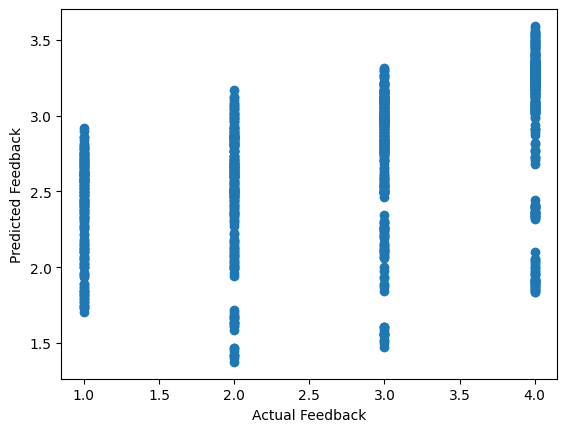

In [25]:
import matplotlib.pyplot as plt
plt.scatter(Y_train,Y_pred_train)
plt.xlabel("Actual Feedback")
plt.ylabel("Predicted Feedback")
plt.show()

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(Y_train,Y_pred_train)

0.21038024761210328

In [28]:
Y_pred_test= lr.predict(X_test)

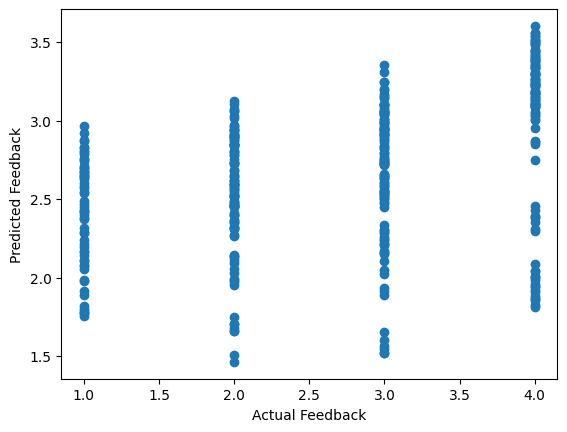

In [29]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred_test)
plt.xlabel("Actual Feedback")
plt.ylabel("Predicted Feedback")
plt.show()

In [30]:
r2_score(Y_test,Y_pred_test)

0.1616253798541869

# **Decision Tree**

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [49]:
df=final
df

,\nDhaka- Khulna\n,Dhaka-Sylhet,Dhaka-Chittagong,Summer,Rainy Season,Day,Night,Number Of Tickets\n,Seat1,Seat2,Seat3,Ena,Hanif,Purbasha
0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
1,1,0,0,1,0,1,0,0,1,0,0,0,0,1
2,1,0,0,1,0,1,0,0,2,0,0,0,0,1
3,1,0,0,1,0,1,0,0,3,0,0,0,0,1
4,1,0,0,1,0,1,0,0,4,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0,0,1,0,1,0,1,2,15,9,5,0,1,0
1296,0,0,1,0,1,0,1,2,12,7,4,0,1,0
1297,0,0,1,0,1,0,1,2,9,5,3,0,1,0
1298,0,0,1,0,1,0,1,2,6,3,2,0,1,0


In [33]:
le=LabelEncoder()

le.fit(df['Number Of Tickets\n'])
df['Number Of Tickets\n'] = le.transform(df['Number Of Tickets\n'])


le.fit(df['Seat1'])
df['Seat1'] = le.transform(df['Seat1'])


le.fit(df['Seat2'])
df['Seat2'] = le.transform(df['Seat2'])


le.fit(df['Seat3'])
df['Seat3'] = le.transform(df['Seat3'])

le.fit(df['Feedback'])
df['Feedback'] = le.transform(df['Feedback'])

df['Dhaka-Chittagong']=le.fit_transform(df['Dhaka-Chittagong'])
df['Dhaka-Sylhet']=le.fit_transform(df['Dhaka-Sylhet'])
df['\nDhaka- Khulna\n']=le.transform(df['\nDhaka- Khulna\n'])
df['Summer']=le.transform(df['Summer'])
df['Rainy Season']=le.transform(df['Rainy Season'])
df['Day']=le.transform(df['Day'])
df['Night']=le.transform(df['Night'])
#df['Number Of Tickets\n']=le.transform(df['Number Of Tickets\n'])
#df['Seat1']=le.transform(df['Seat1'])
#df['Seat2']=le.transform(df['Seat2'])
#df['Seat3']=le.transform(df['Seat3'])
#df['Feedback']=le.transform(df['Feedback'])
df['Ena']=le.transform(df['Ena'])
df['Hanif']=le.transform(df['Hanif'])
df['Purbasha']=le.transform(df['Purbasha'])

In [34]:
independent_variable=df.drop('Feedback',axis='columns')
dependent_variable=df['Feedback']

In [35]:
model=tree.DecisionTreeClassifier()

In [36]:
model.fit(independent_variable,dependent_variable)

DecisionTreeClassifier()

In [37]:
model.score(independent_variable,dependent_variable)

1.0

In [38]:
#Seat Prediction
#\nDhaka- Khulna\n,	Dhaka-Sylhet ,	Dhaka-Chittagong,	Summer,	Rainy Season,
#	Day,	Night,	Number Of Tickets\n,	Seat1,	Seat2,	Seat3,	Ena,	Hanif,	Purbasha

model.predict([[1,0,0,	1,	0,	1,	0,	2,	32,33,	0,	0,	0,	1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([3])

In [39]:
plt.figure(figsize=(120,80))
plot_tree(model,filled=True,feature_names=df.columns,class_names=df['Feedback'].unique())
plot.show()

TypeError: ignored

In [ ]:
plt.figure(figsize=(120,80))
plot_tree(model,filled=True,feature_names=df.columns,class_names=le.classes_,max_depth=10)
plot.show()

# **Random Forest**

In [50]:
df

,\nDhaka- Khulna\n,Dhaka-Sylhet,Dhaka-Chittagong,Summer,Rainy Season,Day,Night,Number Of Tickets\n,Seat1,Seat2,Seat3,Ena,Hanif,Purbasha
0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
1,1,0,0,1,0,1,0,0,1,0,0,0,0,1
2,1,0,0,1,0,1,0,0,2,0,0,0,0,1
3,1,0,0,1,0,1,0,0,3,0,0,0,0,1
4,1,0,0,1,0,1,0,0,4,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0,0,1,0,1,0,1,2,15,9,5,0,1,0
1296,0,0,1,0,1,0,1,2,12,7,4,0,1,0
1297,0,0,1,0,1,0,1,2,9,5,3,0,1,0
1298,0,0,1,0,1,0,1,2,6,3,2,0,1,0


In [47]:
# labels=df.pop("Feedback")

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.25)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train,Y_train)

In [ ]:
Y_pred = rf.predict(X_test)


In [ ]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds=roc_curve(Y_test,Y_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

# **Confusion Matrix**

In [42]:
from sklearn.metrics import confusion_matrix

In [64]:
final

,\nDhaka- Khulna\n,Dhaka-Sylhet,Dhaka-Chittagong,Summer,Rainy Season,Day,Night,Number Of Tickets\n,Seat1,Seat2,Seat3,Feedback,Ena,Hanif,Purbasha
0,1,0,0,1,0,1,0,1,11,0,0,2,0,0,1
1,1,0,0,1,0,1,0,1,12,0,0,3,0,0,1
2,1,0,0,1,0,1,0,1,13,0,0,3,0,0,1
3,1,0,0,1,0,1,0,1,21,0,0,1,0,0,1
4,1,0,0,1,0,1,0,1,22,0,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0,0,1,0,1,0,1,3,61,52,53,4,0,1,0
1296,0,0,1,0,1,0,1,3,51,42,43,1,0,1,0
1297,0,0,1,0,1,0,1,3,41,32,33,1,0,1,0
1298,0,0,1,0,1,0,1,3,31,22,23,1,0,1,0


In [65]:
final.head()
final.info()
final.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   
Dhaka- Khulna
     1300 non-null   int64
 1   Dhaka-Sylhet        1300 non-null   int64
 2   Dhaka-Chittagong    1300 non-null   int64
 3   Summer              1300 non-null   int64
 4   Rainy Season        1300 non-null   int64
 5   Day                 1300 non-null   int64
 6   Night               1300 non-null   int64
 7   Number Of Tickets
  1300 non-null   int64
 8   Seat1               1300 non-null   int64
 9   Seat2               1300 non-null   int64
 10  Seat3               1300 non-null   int64
 11  Feedback            1300 non-null   int64
 12  Ena                 1300 non-null   uint8
 13  Hanif               1300 non-null   uint8
 14  Purbasha            1300 non-null   uint8
dtypes: int64(12), uint8(3)
memory usage: 135.8 KB


\nDhaka- Khulna\n      int64
Dhaka-Sylhet           int64
Dhaka-Chittagong       int64
Summer                 int64
Rainy Season           int64
Day                    int64
Night                  int64
Number Of Tickets\n    int64
Seat1                  int64
Seat2                  int64
Seat3                  int64
Feedback               int64
Ena                    uint8
Hanif                  uint8
Purbasha               uint8
dtype: object

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [70]:
X = final.drop('Feedback', axis=1)  # Features
y = final['Feedback']  #

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
clf = RandomForestClassifier()

In [73]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
y_pred = clf.predict(X_test)

In [75]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [76]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.6576923076923077
Confusion Matrix:
[[20 15  5  0]
 [12 37 18  2]
 [14 16 51  6]
 [ 0  0  1 63]]
Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.50      0.47        40
           2       0.54      0.54      0.54        69
           3       0.68      0.59      0.63        87
           4       0.89      0.98      0.93        64

    accuracy                           0.66       260
   macro avg       0.64      0.65      0.64       260
weighted avg       0.66      0.66      0.66       260



In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [81]:
y_pred = clf.predict(X_test)

In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)


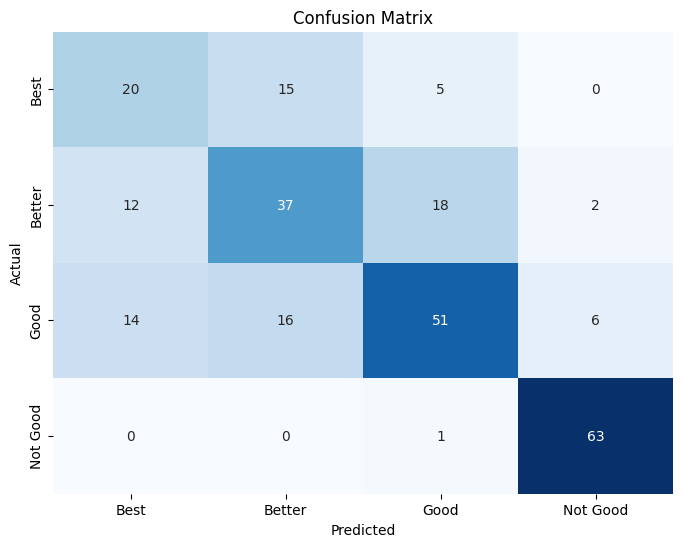

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Best', 'Better','Good', 'Not Good'],
            yticklabels=['Best', 'Better','Good', 'Not Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()